In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model # Functional API

In [6]:
model= Model(inputs=x, outputs=[output1, output2])

In [3]:
from keras.layers import *# import all

In [4]:
x= Input(shape=(3,))

In [5]:
hidden1= Dense(128, activation='relu')(x)
hidden2= Dense(64, activation='relu')(hidden1)

output1= Dense(1, activation='linear')(hidden2)
output2= Dense(1, activation='sigmoid')(hidden2)

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          512         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 1)            65          ['dense_1[0][0]']                
                                                                                              

In [8]:
from keras.utils import plot_model

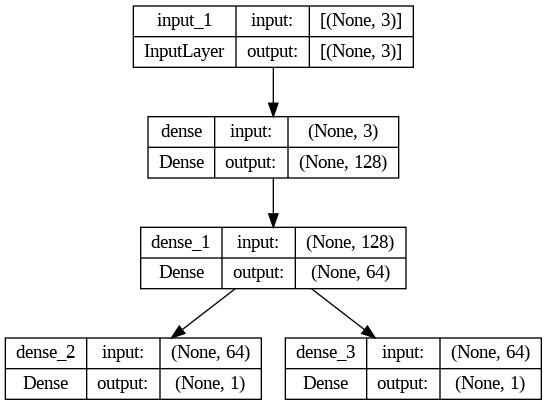

In [9]:
plot_model(model, show_shapes= True)

Example

In [10]:
# Define two sets of inputs
inputA= Input(shape=(32,))
inputB= Input(shape=(128,))

In [11]:
# 1st branch operates on 1st input
x= Dense(8, activation='relu')(inputA)
x1= Dense(4, activation='relu')(x)

In [12]:
# 2nd branch operates on 2nd input
y= Dense(64, activation='relu')(inputB)
y1= Dense(32, activation='relu')(y)
y2= Dense(4, activation='relu')(y1)

In [13]:
# Combine the output of the two branches
combined = concatenate([x1, y2])

In [14]:
# Apply Fully Connected Layer and then a regression prediction basis the combined data
z= Dense(2, activation='relu')(combined)
z1= Dense(1, activation='linear')(z)

In [15]:
# Model will accept input of different branches and then output a single value
model= Model(inputs=[inputA, inputB], outputs=z1)

In [16]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 64)           8256        ['input_3[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 8)            264         ['input_2[0][0]']                
                                                                                            

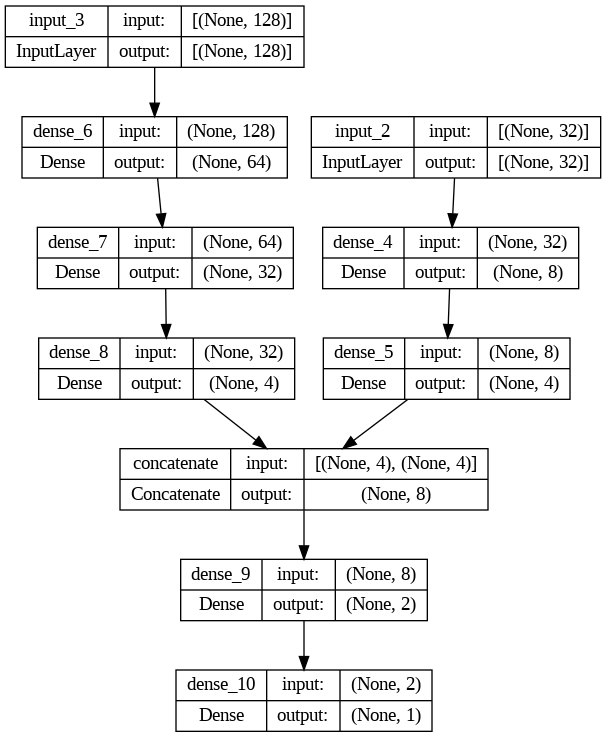

In [17]:
plot_model(model, show_shapes= True)

Kaggle Project

https://www.kaggle.com/datasets/jangedoo/utkface-new

In [21]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [22]:
!kaggle datasets download -d jangedoo/utkface-new

100% 330M/331M [00:18<00:00, 20.1MB/s]
100% 331M/331M [00:18<00:00, 18.4MB/s]


In [23]:
import zipfile
zip_ref= zipfile.ZipFile('/content/utkface-new.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [24]:
import os, sys
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [25]:
folder_path= '/content/utkface_aligned_cropped/UTKFace'

In [26]:
age= []
gender= []
img_path= []

for file in os.listdir(folder_path):
    age.append(int(file.split('_')[0]))
    gender.append(int(file.split('_')[1]))
    img_path.append(file)

In [27]:
age

[29,
 40,
 13,
 8,
 26,
 26,
 2,
 26,
 30,
 35,
 35,
 26,
 1,
 42,
 46,
 30,
 38,
 24,
 29,
 28,
 26,
 40,
 1,
 42,
 61,
 29,
 27,
 46,
 48,
 26,
 4,
 68,
 29,
 5,
 28,
 27,
 60,
 14,
 28,
 9,
 36,
 32,
 27,
 76,
 45,
 40,
 26,
 28,
 32,
 14,
 16,
 24,
 53,
 26,
 1,
 15,
 3,
 44,
 24,
 35,
 2,
 26,
 28,
 20,
 41,
 26,
 15,
 22,
 54,
 4,
 45,
 22,
 50,
 35,
 72,
 4,
 28,
 36,
 36,
 53,
 2,
 33,
 20,
 26,
 34,
 27,
 2,
 1,
 56,
 47,
 70,
 32,
 23,
 10,
 53,
 14,
 26,
 44,
 43,
 26,
 25,
 72,
 26,
 28,
 30,
 1,
 1,
 47,
 24,
 34,
 53,
 25,
 56,
 45,
 25,
 28,
 24,
 29,
 35,
 26,
 1,
 25,
 25,
 28,
 3,
 26,
 9,
 34,
 26,
 20,
 26,
 8,
 28,
 47,
 28,
 19,
 29,
 9,
 30,
 23,
 53,
 37,
 69,
 1,
 25,
 30,
 14,
 26,
 8,
 62,
 26,
 25,
 5,
 35,
 24,
 56,
 26,
 90,
 1,
 15,
 58,
 60,
 59,
 17,
 76,
 35,
 7,
 36,
 26,
 22,
 25,
 65,
 75,
 28,
 13,
 39,
 30,
 2,
 27,
 56,
 28,
 27,
 12,
 28,
 21,
 2,
 30,
 40,
 20,
 1,
 27,
 1,
 55,
 57,
 35,
 24,
 23,
 32,
 29,
 58,
 70,
 28,
 38,
 90,
 32,
 58,
 

In [28]:
gender

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,


In [29]:
img_path

['29_0_0_20170117202647791.jpg.chip.jpg',
 '40_0_3_20170104165011263.jpg.chip.jpg',
 '13_0_0_20170110224751365.jpg.chip.jpg',
 '8_1_0_20170109203559320.jpg.chip.jpg',
 '26_0_3_20170117154527678.jpg.chip.jpg',
 '26_0_0_20170117200559815.jpg.chip.jpg',
 '2_0_4_20161221202417666.jpg.chip.jpg',
 '26_1_4_20170103225002166.jpg.chip.jpg',
 '30_1_0_20170117134255854.jpg.chip.jpg',
 '35_0_1_20170117091619928.jpg.chip.jpg',
 '35_1_1_20170116010333522.jpg.chip.jpg',
 '26_0_1_20170114033050455.jpg.chip.jpg',
 '1_0_3_20161220215943341.jpg.chip.jpg',
 '42_1_0_20170117121915102.jpg.chip.jpg',
 '46_0_0_20170104205743292.jpg.chip.jpg',
 '30_1_0_20170117131055904.jpg.chip.jpg',
 '38_0_1_201701162330572788.jpg.chip.jpg',
 '24_1_3_20170119155454786.jpg.chip.jpg',
 '29_0_1_20170104202114602.jpg.chip.jpg',
 '28_0_0_20170117120854505.jpg.chip.jpg',
 '26_0_0_20170104194358449.jpg.chip.jpg',
 '40_1_0_20170117155203150.jpg.chip.jpg',
 '1_1_0_20170109191817067.jpg.chip.jpg',
 '42_0_0_20170105172318206.jpg.chip.j

In [30]:
len(img_path)

23708

In [31]:
df= pd.DataFrame({'age': age, 'gender': gender, 'img': img_path})

In [32]:
df.shape

(23708, 3)

In [33]:
df.head()

,age,gender,img
0,29,0,29_0_0_20170117202647791.jpg.chip.jpg
1,40,0,40_0_3_20170104165011263.jpg.chip.jpg
2,13,0,13_0_0_20170110224751365.jpg.chip.jpg
3,8,1,8_1_0_20170109203559320.jpg.chip.jpg
4,26,0,26_0_3_20170117154527678.jpg.chip.jpg


In [34]:
train_df= df.sample(frac=1, random_state=0).iloc[:20000]
test_df= df.sample(frac=1, random_state=0).iloc[20000:]

In [35]:
train_df.shape

(20000, 3)

In [36]:
test_df.shape

(3708, 3)

In [37]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range= 0.2,
                                  height_shift_range= 0.2, shear_range=0.2, zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen= ImageDataGenerator(rescale=1./255)

In [38]:
train_generator= train_datagen.flow_from_dataframe(train_df, directory= folder_path,
                                                   x_col= 'img', y_col= ['age', 'gender'],
                                                   target_size= (200,200),
                                                   class_mode= 'multi_output')

test_generator= test_datagen.flow_from_dataframe(test_df, directory= folder_path,
                                                   x_col= 'img', y_col= ['age', 'gender'],
                                                   target_size= (200,200),
                                                   class_mode= 'multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [39]:
# Functional API- Tranfer Learning
# VGG16

from keras.applications import VGG16

In [40]:
from keras.layers import *
from keras.models import Model# Functional API
vgg16= VGG16(include_top= False, input_shape=(200,200,3))

58889256/58889256 [==============================] - 4s 0us/step


In [41]:
vgg16= VGG16(include_top= False, input_shape=(200,200,3))
vgg16.trainable= False #Fine tuning

output= vgg16.layers[-1].output
flatten= Flatten()(output)
dense1= Dense(512, activation='relu')(flatten)
dense2= Dense(512, activation='relu')(flatten)

dense3= Dense(512, activation='relu')(dense1)
dense4= Dense(512, activation='relu')(dense2)

output1= Dense(1, activation='linear', name='age')(dense3)
output2= Dense(1, activation='sigmoid', name='gender')(dense4)

In [42]:
model= Model(inputs=vgg16.input, outputs=[output1, output2])

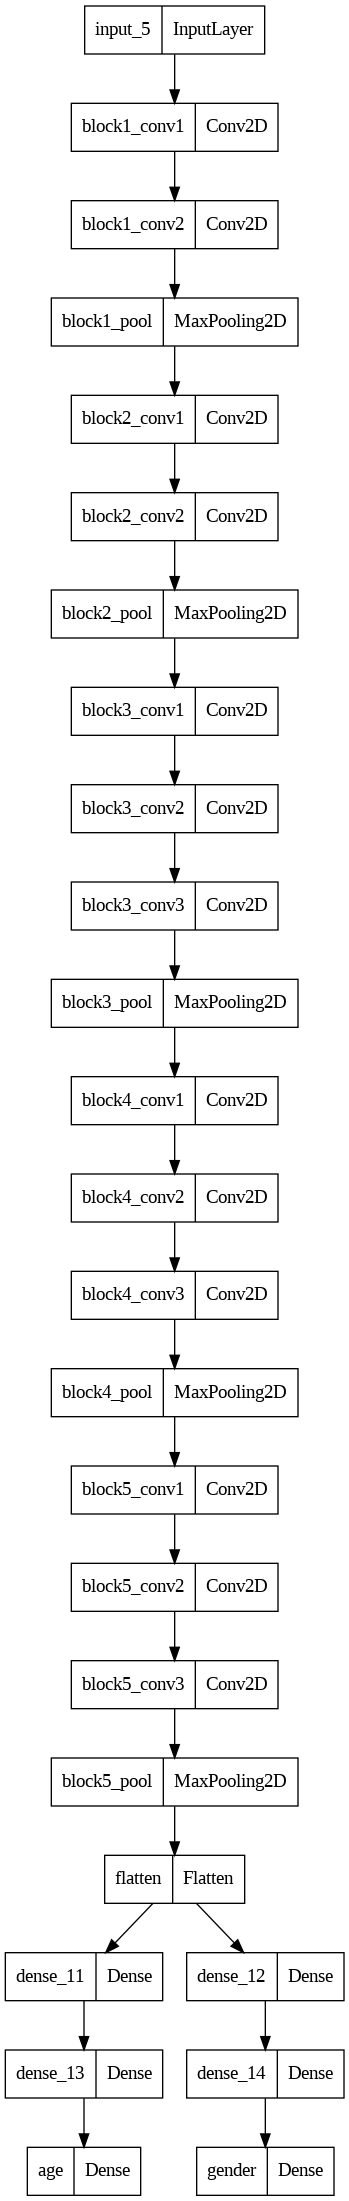

In [43]:
plot_model(model)

In [45]:
model.compile(optimizer='adam', loss={'age':'mae', 'gender':'binary_crossentropy'},
              metrics= {'age':'mae', 'gender':'accuracy'}, loss_weights= {'age':1, 'gender':99})

In [ ]:
model.fit(train_generator, validation_data= test_generator, batch_size=32, epochs=5)

Epoch 1/5
625/625 [==============================] - 253s 383ms/step - loss: 62.2596 - age_loss: 10.6881 - gender_loss: 0.5209 - age_mae: 10.6881 - gender_accuracy: 0.7480 - val_loss: 46.9792 - val_age_loss: 8.6545 - val_gender_loss: 0.3871 - val_age_mae: 8.6545 - val_gender_accuracy: 0.8261
Epoch 2/5
625/625 [==============================] - 241s 386ms/step - loss: 52.0074 - age_loss: 9.4066 - gender_loss: 0.4303 - age_mae: 9.4066 - gender_accuracy: 0.7958 - val_loss: 45.9824 - val_age_loss: 8.3367 - val_gender_loss: 0.3803 - val_age_mae: 8.3367 - val_gender_accuracy: 0.8093
Epoch 3/5
215/625 [=========>....................] - ETA: 2:22 - loss: 50.0916 - age_loss: 9.0626 - gender_loss: 0.4144 - age_mae: 9.0626 - gender_accuracy: 0.8045